In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/sjleshrac/tvs-loan-default/data")

Skipping, found downloaded files in "./tvs-loan-default" (use force=True to force download)


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rc
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline
from scipy import stats

# Regular expressions
import re

# seaborn : advanced visualization
import seaborn as sns
print('seaborn version\t:',sns.__version__)


seaborn version	: 0.13.1


**Load data from the file path of csv as a DataFrame object**


In [ ]:
loan = pd.read_csv('/content/tvs-loan-default/TVS.csv')
loan.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


**Rename columns to identify data in it**

In [ ]:
data = loan.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI',
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler',
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})

data.head()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


**Remove irrelevant columns**

In [ ]:
not_required_cols = ['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)']
data.drop(labels = not_required_cols, axis =1, inplace=True)
data.shape

(119528, 30)

**Ratio of loans taken based on *Gender***

In [ ]:
data.Gender.value_counts()

,count
Gender,
MALE,73608
FEMALE,11440


**Pie chart of loans taken by *Gender***

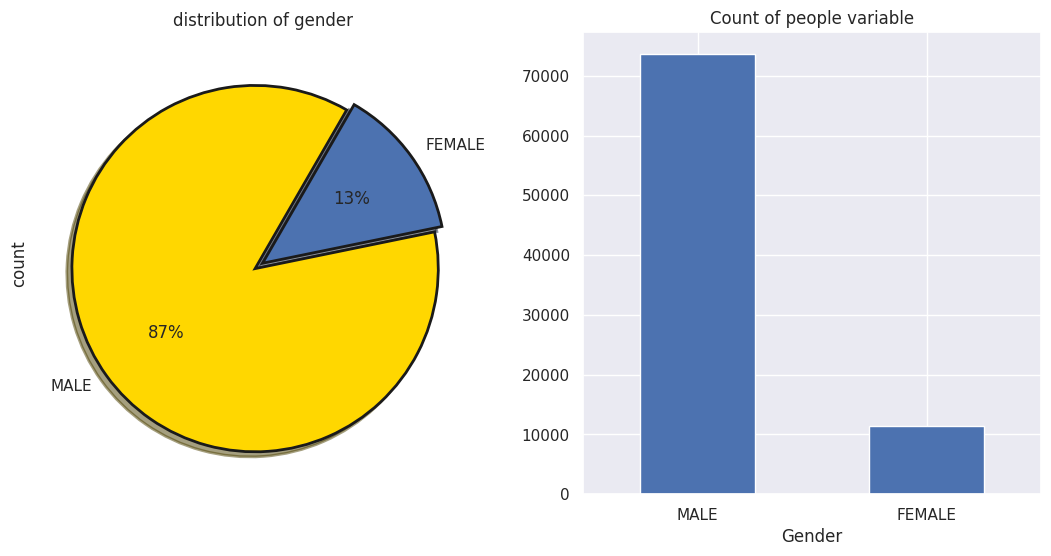

In [ ]:
sns.set(style="darkgrid")

fig = plt.figure(figsize=(13,6))
plt.subplot(121)

data["Gender"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["gold","b"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("distribution of gender")

plt.subplot(122)
ax = data["Gender"].value_counts().plot(kind="bar",color='b')
plt.xticks(rotation=0)
plt.title("Count of people variable")

plt.show()

**1. Loan Amount**

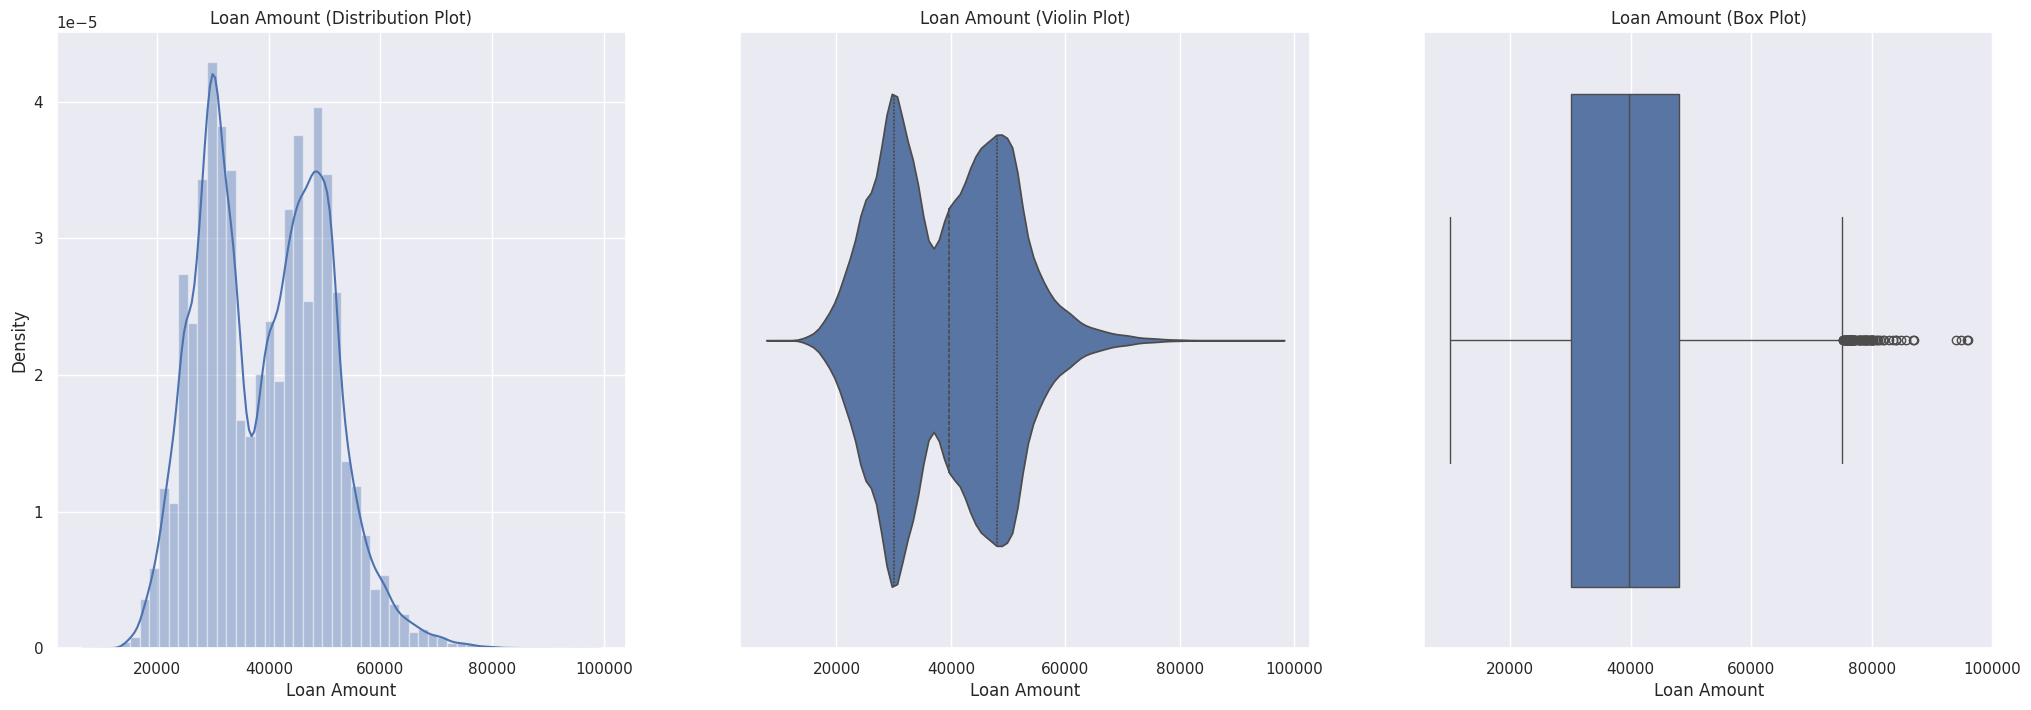

In [ ]:
sns.set(style="darkgrid")

fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(25,8))
ax[0].set_title("Loan Amount (Distribution Plot)")
sns.distplot(data['Loan Amount'],ax=ax[0])
ax[1].set_title("Loan Amount (Violin Plot)")
sns.violinplot(data =data, x='Loan Amount',ax=ax[1], inner="quartile")
ax[2].set_title("Loan Amount (Box Plot)")
sns.boxplot(data =data, x='Loan Amount',ax=ax[2],orient='v')
plt.show()

**2. Interest Rate**

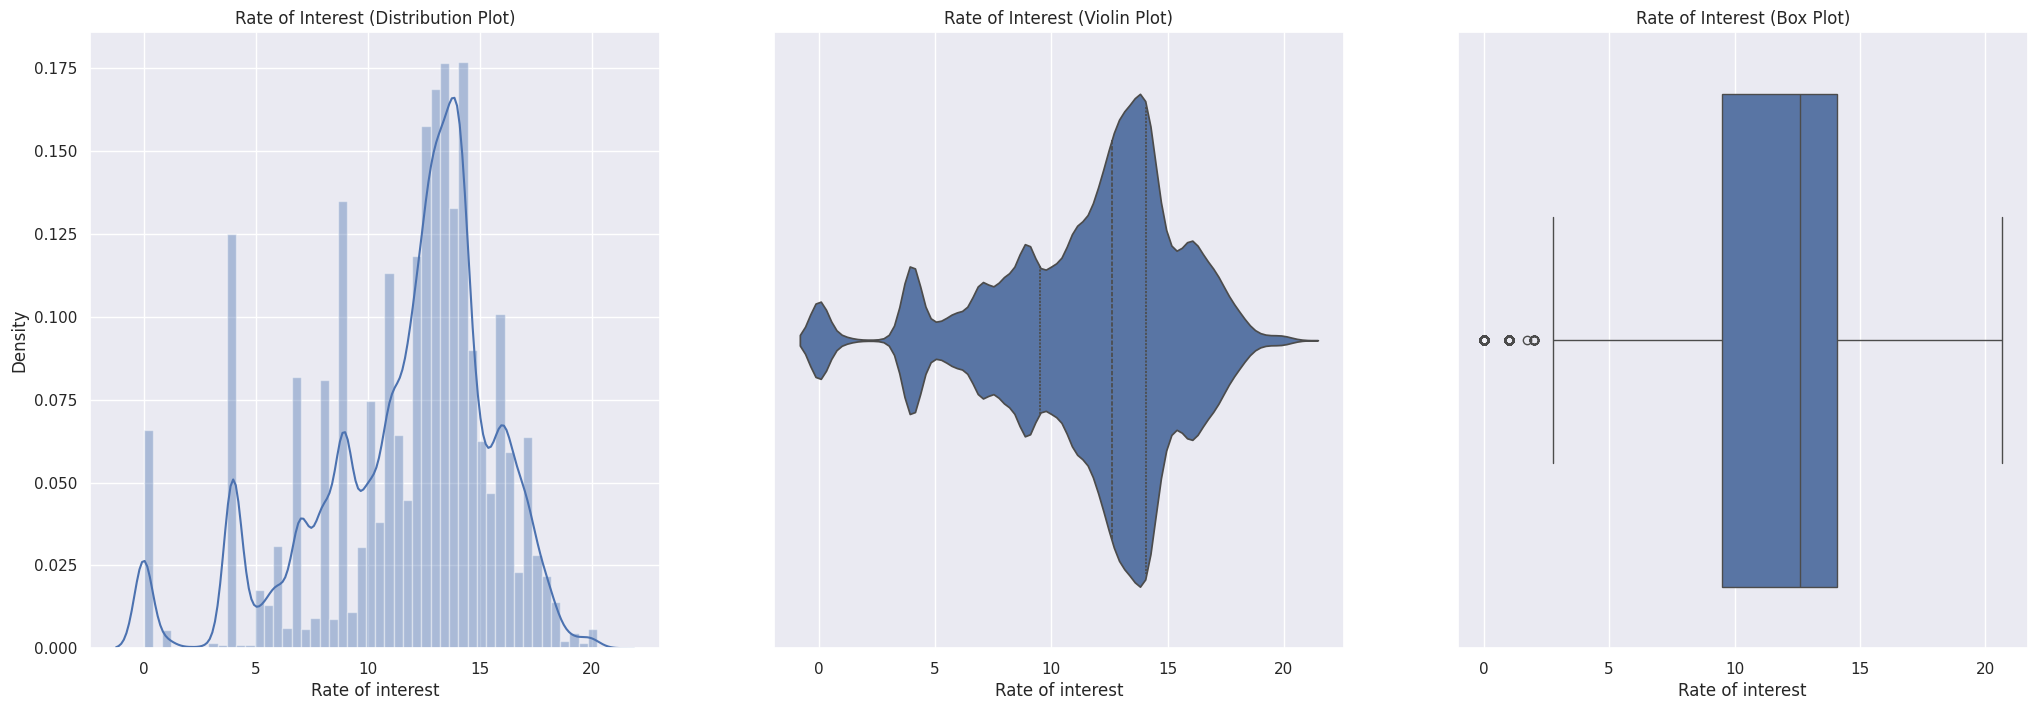

In [ ]:
sns.set(style="darkgrid")

fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(25,8))
ax[0].set_title("Rate of Interest (Distribution Plot)")
sns.distplot(data['Rate of interest'],ax=ax[0])
ax[1].set_title("Rate of Interest (Violin Plot)")
sns.violinplot(data =data, x='Rate of interest',ax=ax[1], inner="quartile")
ax[2].set_title("Rate of Interest (Box Plot)")
sns.boxplot(data =data, x='Rate of interest',ax=ax[2],orient='v')
plt.show()

**3. Age at which customer has taken the loan**  ***(Client's Age)***

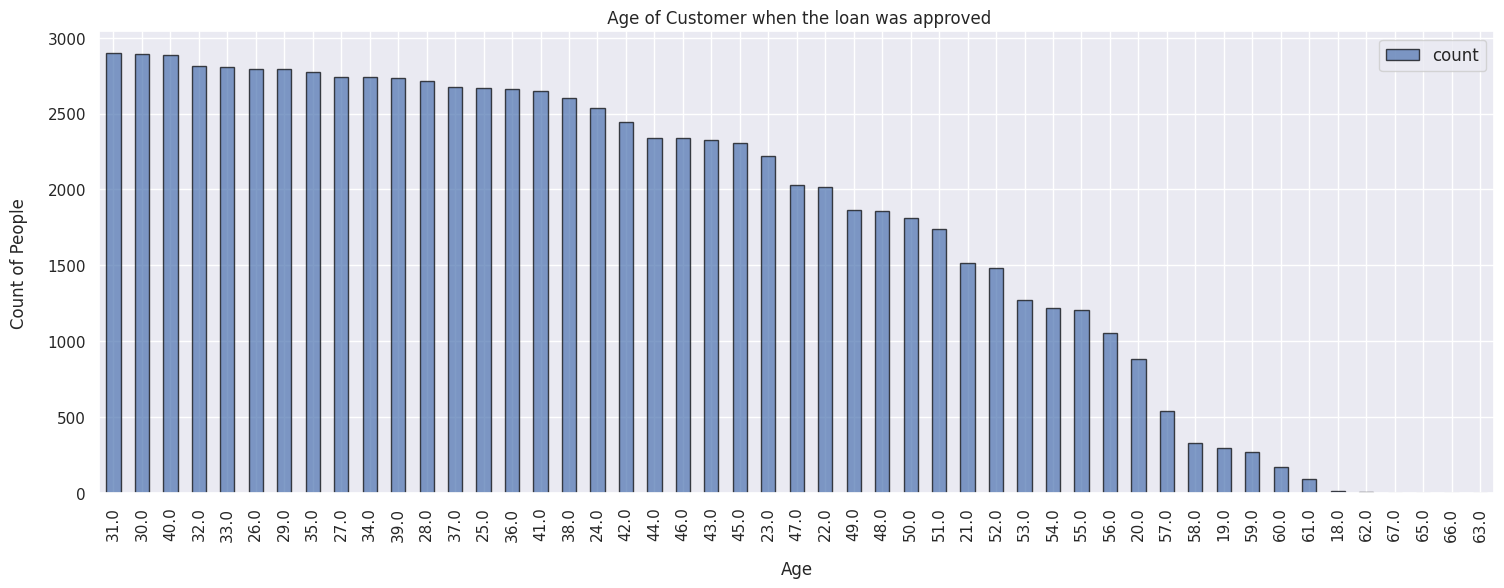

In [ ]:
plt.figure(figsize=(18,6))

#bar plot
data['Customer age when loanwas taken'].value_counts().plot(kind='bar',color='b',alpha=0.7, edgecolor='black')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title(" Age of Customer when the loan was approved")
plt.legend(loc="best",prop={"size":12})
plt.show()

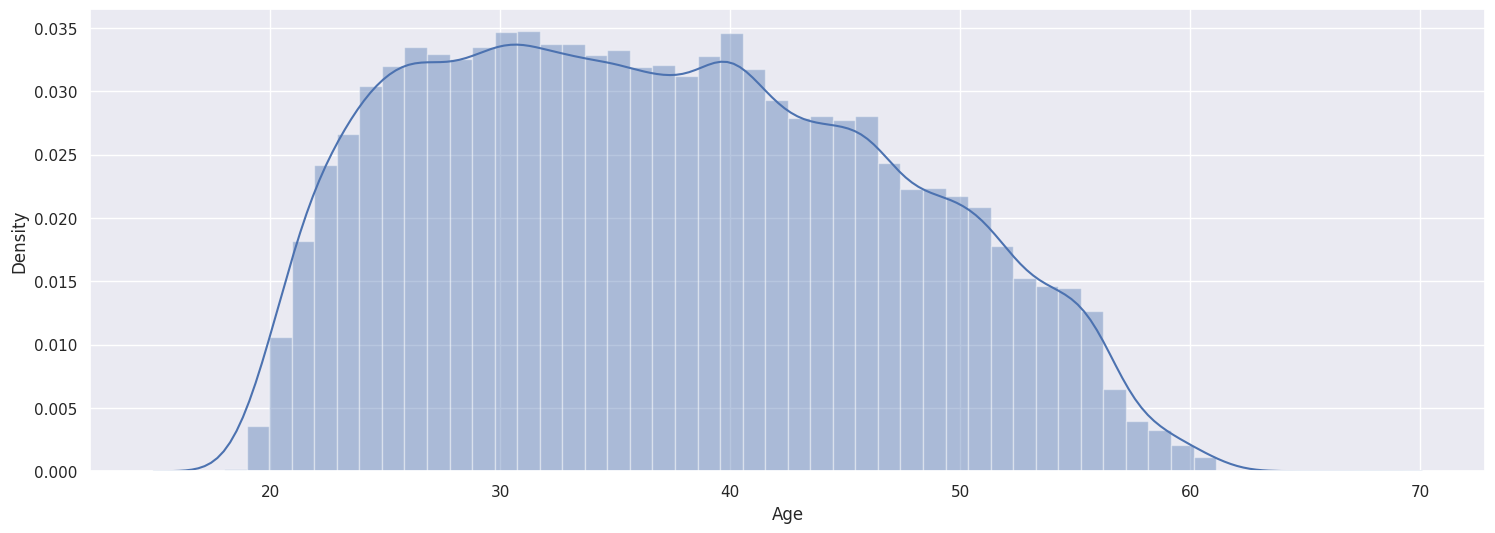

In [ ]:
plt.figure(figsize=(18,6))

#histogarm
sns.distplot(data["Customer age when loanwas taken"],color="b")
plt.xlabel('Age')
plt.show()

**4. Ratio of loan taken by Two-Wheeler type**

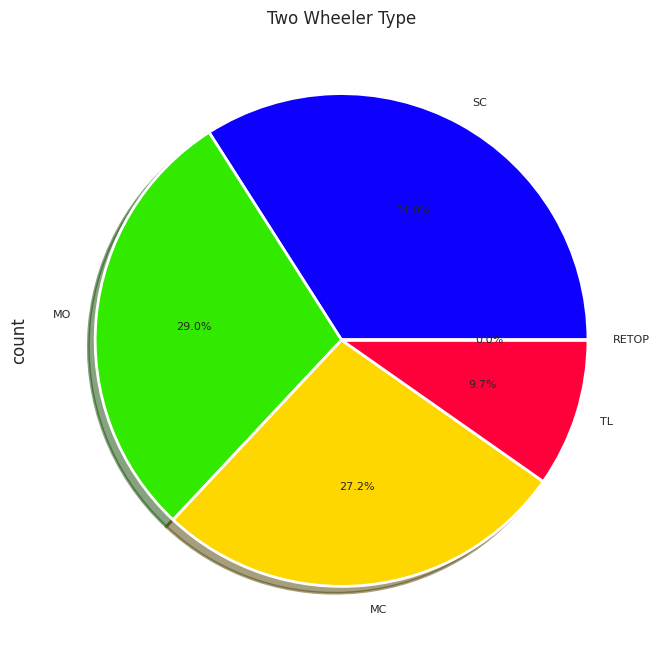

In [ ]:
plt.figure(figsize=(8,8))
data["Product code of Two wheeler"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",5),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                               shadow =True)
plt.title("Two Wheeler Type")
#MC : Motorcycle , MO : Moped, SC : Scooter
plt.show()

**5. Number of times bounced while repaying the loan**

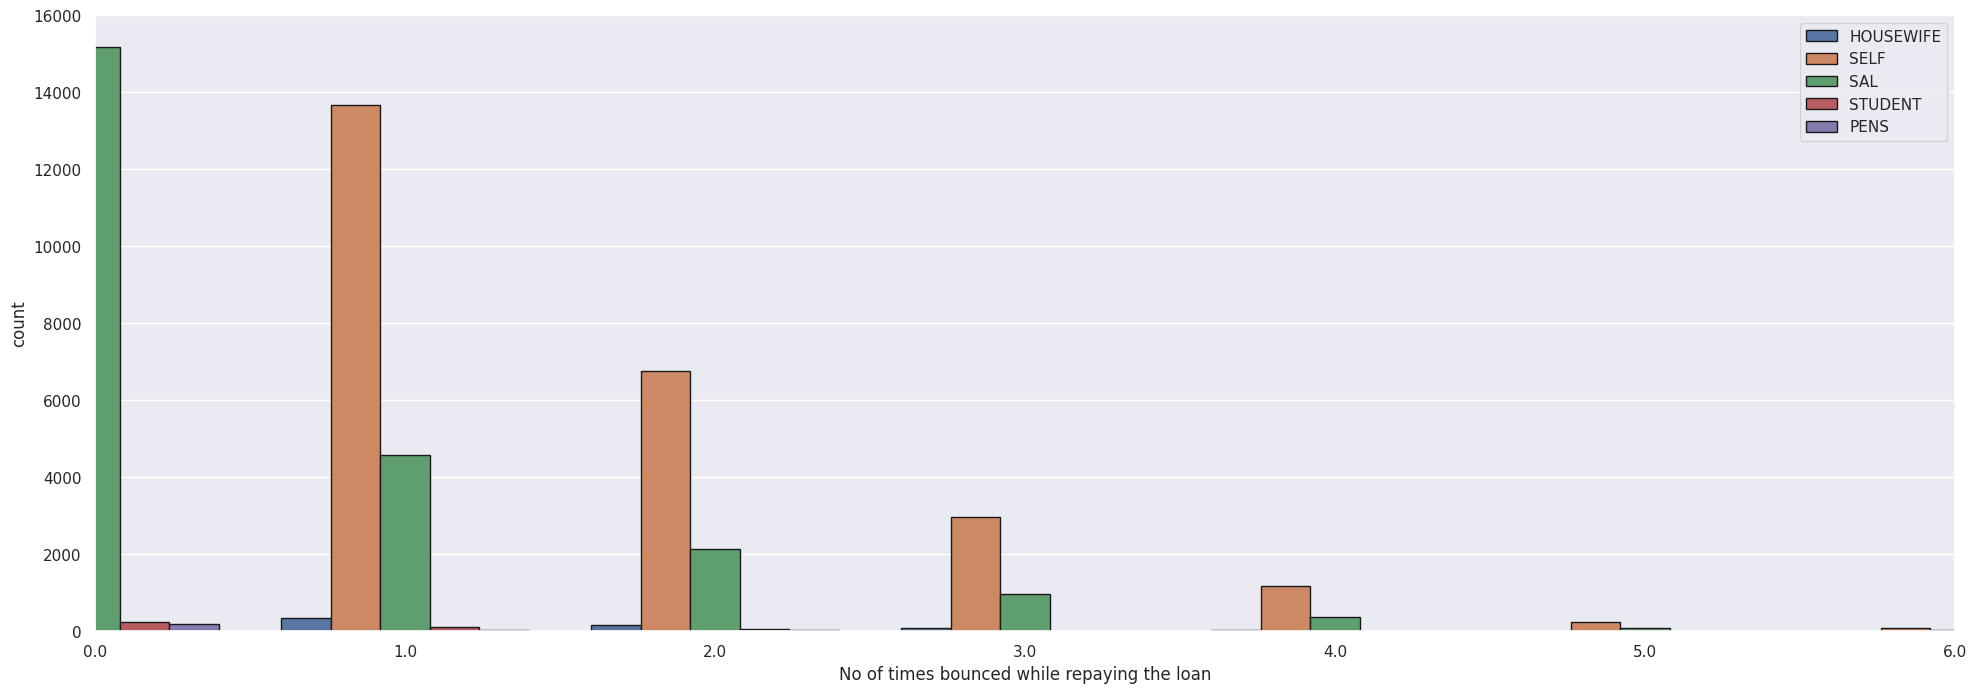

In [ ]:
plt.figure(figsize=(24,8))
sns.countplot(x="No of times bounced while repaying the loan", hue="Employment type", data=data, edgecolor='k')
plt.xlim(0, 6)
plt.ylim(0, 16000)
plt.legend(loc='upper right')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 30 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

In [ ]:
data.describe()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,...,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable
count,119528.000000,119528.000000,119528.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,...,119528.000000,3.662600e+04,119528.0,1.928100e+04,1.902800e+04,104467.000000,119528.000000,119528.000000,119528.000000,119528.000000
mean,59764.500000,0.028378,0.473061,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,0.643930,...,0.909720,2.742192e+05,0.0,4.302522e+05,1.766494e+05,41415.210047,1.076877,0.823991,0.344898,0.021869
std,34504.905825,0.166052,0.859042,5.203209,1.091658,575.614365,11016.619745,5.698900,3754.675342,0.969123,...,2.476597,7.916241e+05,0.0,8.228143e+05,4.075618e+05,13044.008078,3.737882,3.172612,1.478180,0.146258
min,1.000000,0.000000,0.000000,2.000000,0.000000,681.000000,10000.000000,6.000000,1001.000000,0.000000,...,0.000000,1.000000e+00,0.0,9.900000e+01,1.000000e+00,10000.000000,0.000000,0.000000,0.000000,0.000000
25%,29882.750000,0.000000,0.000000,14.000000,0.000000,1895.000000,30000.000000,18.000000,1368.000000,0.000000,...,0.000000,4.190700e+04,0.0,4.490000e+04,3.394050e+04,31000.000000,0.000000,0.000000,0.000000,0.000000
50%,59764.500000,0.000000,0.000000,17.000000,0.000000,2320.000000,39700.000000,24.000000,2307.000000,0.000000,...,0.000000,9.500000e+04,0.0,1.100000e+05,8.800000e+04,42250.000000,0.000000,0.000000,0.000000,0.000000
75%,89646.250000,0.000000,1.000000,21.000000,1.000000,2689.000000,48000.000000,24.000000,3911.000000,1.000000,...,1.000000,3.000000e+05,0.0,4.920000e+05,2.000048e+05,49300.000000,0.000000,0.000000,0.000000,0.000000
max,119528.000000,1.000000,12.000000,36.000000,29.000000,7840.000000,96000.000000,36.000000,21106.000000,6.000000,...,54.000000,1.000000e+08,0.0,2.022777e+07,3.000000e+07,700000.000000,314.000000,243.000000,96.000000,1.000000


In [ ]:
# Dropping unnecessary columns
data_cleaned = data.drop(['Customer ID', 'Dealer codes from where customer has purchased the Two wheeler',
                              'Product code of Two wheeler'], axis=1)


In [ ]:
# Converting categorical variable 'Tier' and 'GENDER' to numerical
data_cleaned['Tier'] = data_cleaned['Tier'].map({'TIER 1': 1, 'TIER 2': 2, 'TIER 3': 3})
data_cleaned['Gender'] = data_cleaned['Gender'].map({'MALE': 0, 'FEMALE': 1})

# Ensure 'Target variable' is also treated correctly
# First fill NaN values with 0
# Now convert to integer
data_cleaned['Target variable'] = data_cleaned['Target variable'].astype(int)

In [ ]:
data_cleaned.head()

,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,No of advance EMI paid,Rate of interest,Gender,...,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,0,0,24.0,0.0,2432.0,46500.0,24.0,0.0,12.75,1.0,...,NaN,0,NaN,NaN,46500.0,0,0,0,1.0,0
1,0,1,24.0,1.0,1495.0,28168.0,24.0,0.0,13.65,0.0,...,NaN,0,NaN,NaN,28168.0,0,0,0,1.0,0
2,0,0,26.0,0.0,1707.0,38900.0,30.0,0.0,12.65,0.0,...,55000.0,0,NaN,105000.0,38900.0,31,31,16,1.0,0
3,0,0,24.0,0.0,2128.0,42900.0,24.0,2.0,9.50,1.0,...,NaN,0,NaN,NaN,42900.0,0,0,0,1.0,0
4,0,0,27.0,0.0,1824.0,40900.0,30.0,0.0,13.50,0.0,...,NaN,0,NaN,NaN,40900.0,0,0,0,1.0,0


In [ ]:
non_numerical_columns=[]
for col in data_cleaned.columns:
    if data_cleaned[col].dtype=='object':
        non_numerical_columns.append(col)

In [ ]:
data_cleaned[non_numerical_columns].head()

,Employment type,Resident type of customer,Date of birth
0,HOUSEWIFE,OWNED,30-05-1974
1,SELF,RENT,01-09-1967
2,SELF,RENT,04-05-1983
3,SAL,RENT,10-12-1989
4,SAL,RENT,24-09-1984


In [ ]:
for col in non_numerical_columns:
    print(data_cleaned[col].value_counts())

Employment type
SELF         59290
SAL          23360
HOUSEWIFE     1670
STUDENT        449
PENS           279
Name: count, dtype: int64
Resident type of customer
OWNED               73013
RENT                11001
OWENED BY OFFICE      117
Name: count, dtype: int64
Date of birth
01-01-1976    749
01-01-1978    706
01-01-1977    701
01-01-1975    687
01-01-1981    684
             ... 
17-03-1987      1
16-06-1956      1
16-01-1967      1
22-11-1971      1
24-09-1965      1
Name: count, Length: 13486, dtype: int64


In [ ]:
data_cleaned = pd.get_dummies(data_cleaned, columns=['Employment type', 'Resident type of customer'], drop_first=True)

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 31 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   Customer has bounced in first EMI                              119528 non-null  int64  
 1   No of times bounced 12 months                                  119528 non-null  int64  
 2   Maximum MOB                                                    85048 non-null   float64
 3   No of times bounced while repaying the loan                    85048 non-null   float64
 4   EMI                                                            85048 non-null   float64
 5   Loan Amount                                                    85048 non-null   float64
 6   Tenure                                                         85048 non-null   float64
 7   No of advance EMI paid                         

In [ ]:
data_cleaned['Date of birth'] = pd.to_datetime(data_cleaned['Date of birth'])
data_cleaned['Day'] = data_cleaned['Date of birth'].dt.day
data_cleaned['Month'] = data_cleaned['Date of birth'].dt.month
data_cleaned['Year'] = data_cleaned['Date of birth'].dt.year

In [ ]:
data_cleaned.drop(columns="Date of birth",inplace=True)

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 33 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   Customer has bounced in first EMI                              119528 non-null  int64  
 1   No of times bounced 12 months                                  119528 non-null  int64  
 2   Maximum MOB                                                    85048 non-null   float64
 3   No of times bounced while repaying the loan                    85048 non-null   float64
 4   EMI                                                            85048 non-null   float64
 5   Loan Amount                                                    85048 non-null   float64
 6   Tenure                                                         85048 non-null   float64
 7   No of advance EMI paid                         

In [ ]:
pd.set_option('display.max_columns', 5000)

In [ ]:
corr_mat=data_cleaned.corr()

In [ ]:
corr_mat

,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,No of advance EMI paid,Rate of interest,Gender,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable,Employment type_PENS,Employment type_SAL,Employment type_SELF,Employment type_STUDENT,Resident type of customer_OWNED,Resident type of customer_RENT,Day,Month,Year
Customer has bounced in first EMI,1.000000,0.045418,0.013064,0.184387,0.008035,0.002481,-0.009574,0.003001,-0.009159,0.003594,-0.020478,-0.007935,-0.006545,-0.001806,-0.004089,NaN,-0.019512,-0.001274,0.009236,0.005489,0.002478,0.001026,-0.003301,0.012339,0.003218,-0.001260,0.004076,0.001036,0.001655,0.003278,-0.014873,-0.004815,0.020170
No of times bounced 12 months,0.045418,1.000000,0.070585,0.840548,-0.046600,-0.051359,-0.004125,0.022493,0.102345,-0.014408,-0.017910,-0.041178,-0.018175,-0.073137,-0.039542,NaN,-0.090758,-0.020094,-0.064064,0.031735,0.028040,0.022757,0.087056,0.071078,-0.007262,-0.057562,0.049987,0.003916,0.020922,-0.027900,-0.045879,-0.035879,0.011742
Maximum MOB,0.013064,0.070585,1.000000,0.206990,-0.327873,0.342105,0.862265,-0.057423,0.429239,0.030286,-0.050077,0.016798,0.005820,0.037071,-0.001874,NaN,-0.008634,-0.024931,0.269398,0.022949,0.019225,0.016448,-0.073245,0.015528,-0.003027,0.058554,-0.062486,0.022936,-0.025231,0.024492,0.035729,0.027270,0.001868
No of times bounced while repaying the loan,0.184387,0.840548,0.206990,1.000000,-0.072246,0.010394,0.107927,0.012306,0.138664,-0.003106,-0.034797,-0.035106,-0.016165,-0.062296,-0.034334,NaN,-0.091666,-0.022092,-0.007029,0.032953,0.027960,0.022439,0.067111,0.069197,-0.008806,-0.051675,0.051267,0.011713,0.018679,-0.016244,-0.037511,-0.031186,0.022617
EMI,0.008035,-0.046600,-0.327873,-0.072246,1.000000,0.637016,-0.312310,0.043748,-0.338051,0.077083,-0.144503,0.077453,0.043151,0.119408,0.066833,NaN,0.139681,0.066718,0.516263,0.026415,0.020721,0.015689,-0.100492,0.001497,0.013136,0.116761,-0.127997,0.033302,-0.022029,0.018959,0.050567,0.042531,0.164394
Loan Amount,0.002481,-0.051359,0.342105,0.010394,0.637016,1.000000,0.483979,0.197994,-0.063173,0.103081,-0.185292,0.120135,0.063156,0.188254,0.055034,NaN,0.129321,0.038296,0.818650,0.051327,0.040438,0.034156,-0.173854,0.017321,0.014177,0.177816,-0.190689,0.045310,-0.072114,0.068543,0.092241,0.070934,0.177403
Tenure,-0.009574,-0.004125,0.862265,0.107927,-0.312310,0.483979,1.000000,0.078462,0.410887,0.034565,-0.052980,0.054507,0.025723,0.085525,-0.009714,NaN,-0.006510,-0.030047,0.379596,0.027827,0.021975,0.019885,-0.087495,0.019041,0.005060,0.084717,-0.086999,0.016685,-0.050945,0.050343,0.059820,0.041963,0.018011
No of advance EMI paid,0.003001,0.022493,-0.057423,0.012306,0.043748,0.197994,0.078462,1.000000,-0.334465,0.016088,-0.012693,0.046361,0.039179,0.006323,-0.002439,NaN,0.001920,0.010724,0.123856,0.025079,0.021841,0.018930,0.026315,-0.007963,0.001558,0.016793,-0.015252,0.003830,-0.000045,0.000004,0.028054,0.015580,0.011294
Rate of interest,-0.009159,0.102345,0.429239,0.138664,-0.338051,-0.063173,0.410887,-0.334465,1.000000,-0.048102,0.074700,-0.079346,-0.052588,-0.103776,-0.040329,NaN,-0.078110,-0.031275,-0.024589,-0.035235,-0.029845,-0.026099,0.109258,0.005452,-0.006680,-0.071281,0.072505,-0.001168,0.045391,-0.041649,-0.019540,-0.017080,-0.095006
Gender,0.003594,-0.014408,0.030286,-0.003106,0.077083,0.103081,0.034565,0.016088,-0.048102,1.000000,-0.083707,-0.000449,-0.001340,-0.012910,0.009146,NaN,0.028047,0.004498,0.068678,-0.031113,-0.028851,-0.027040,-0.020515,-0.015194,0.00

<Axes: >

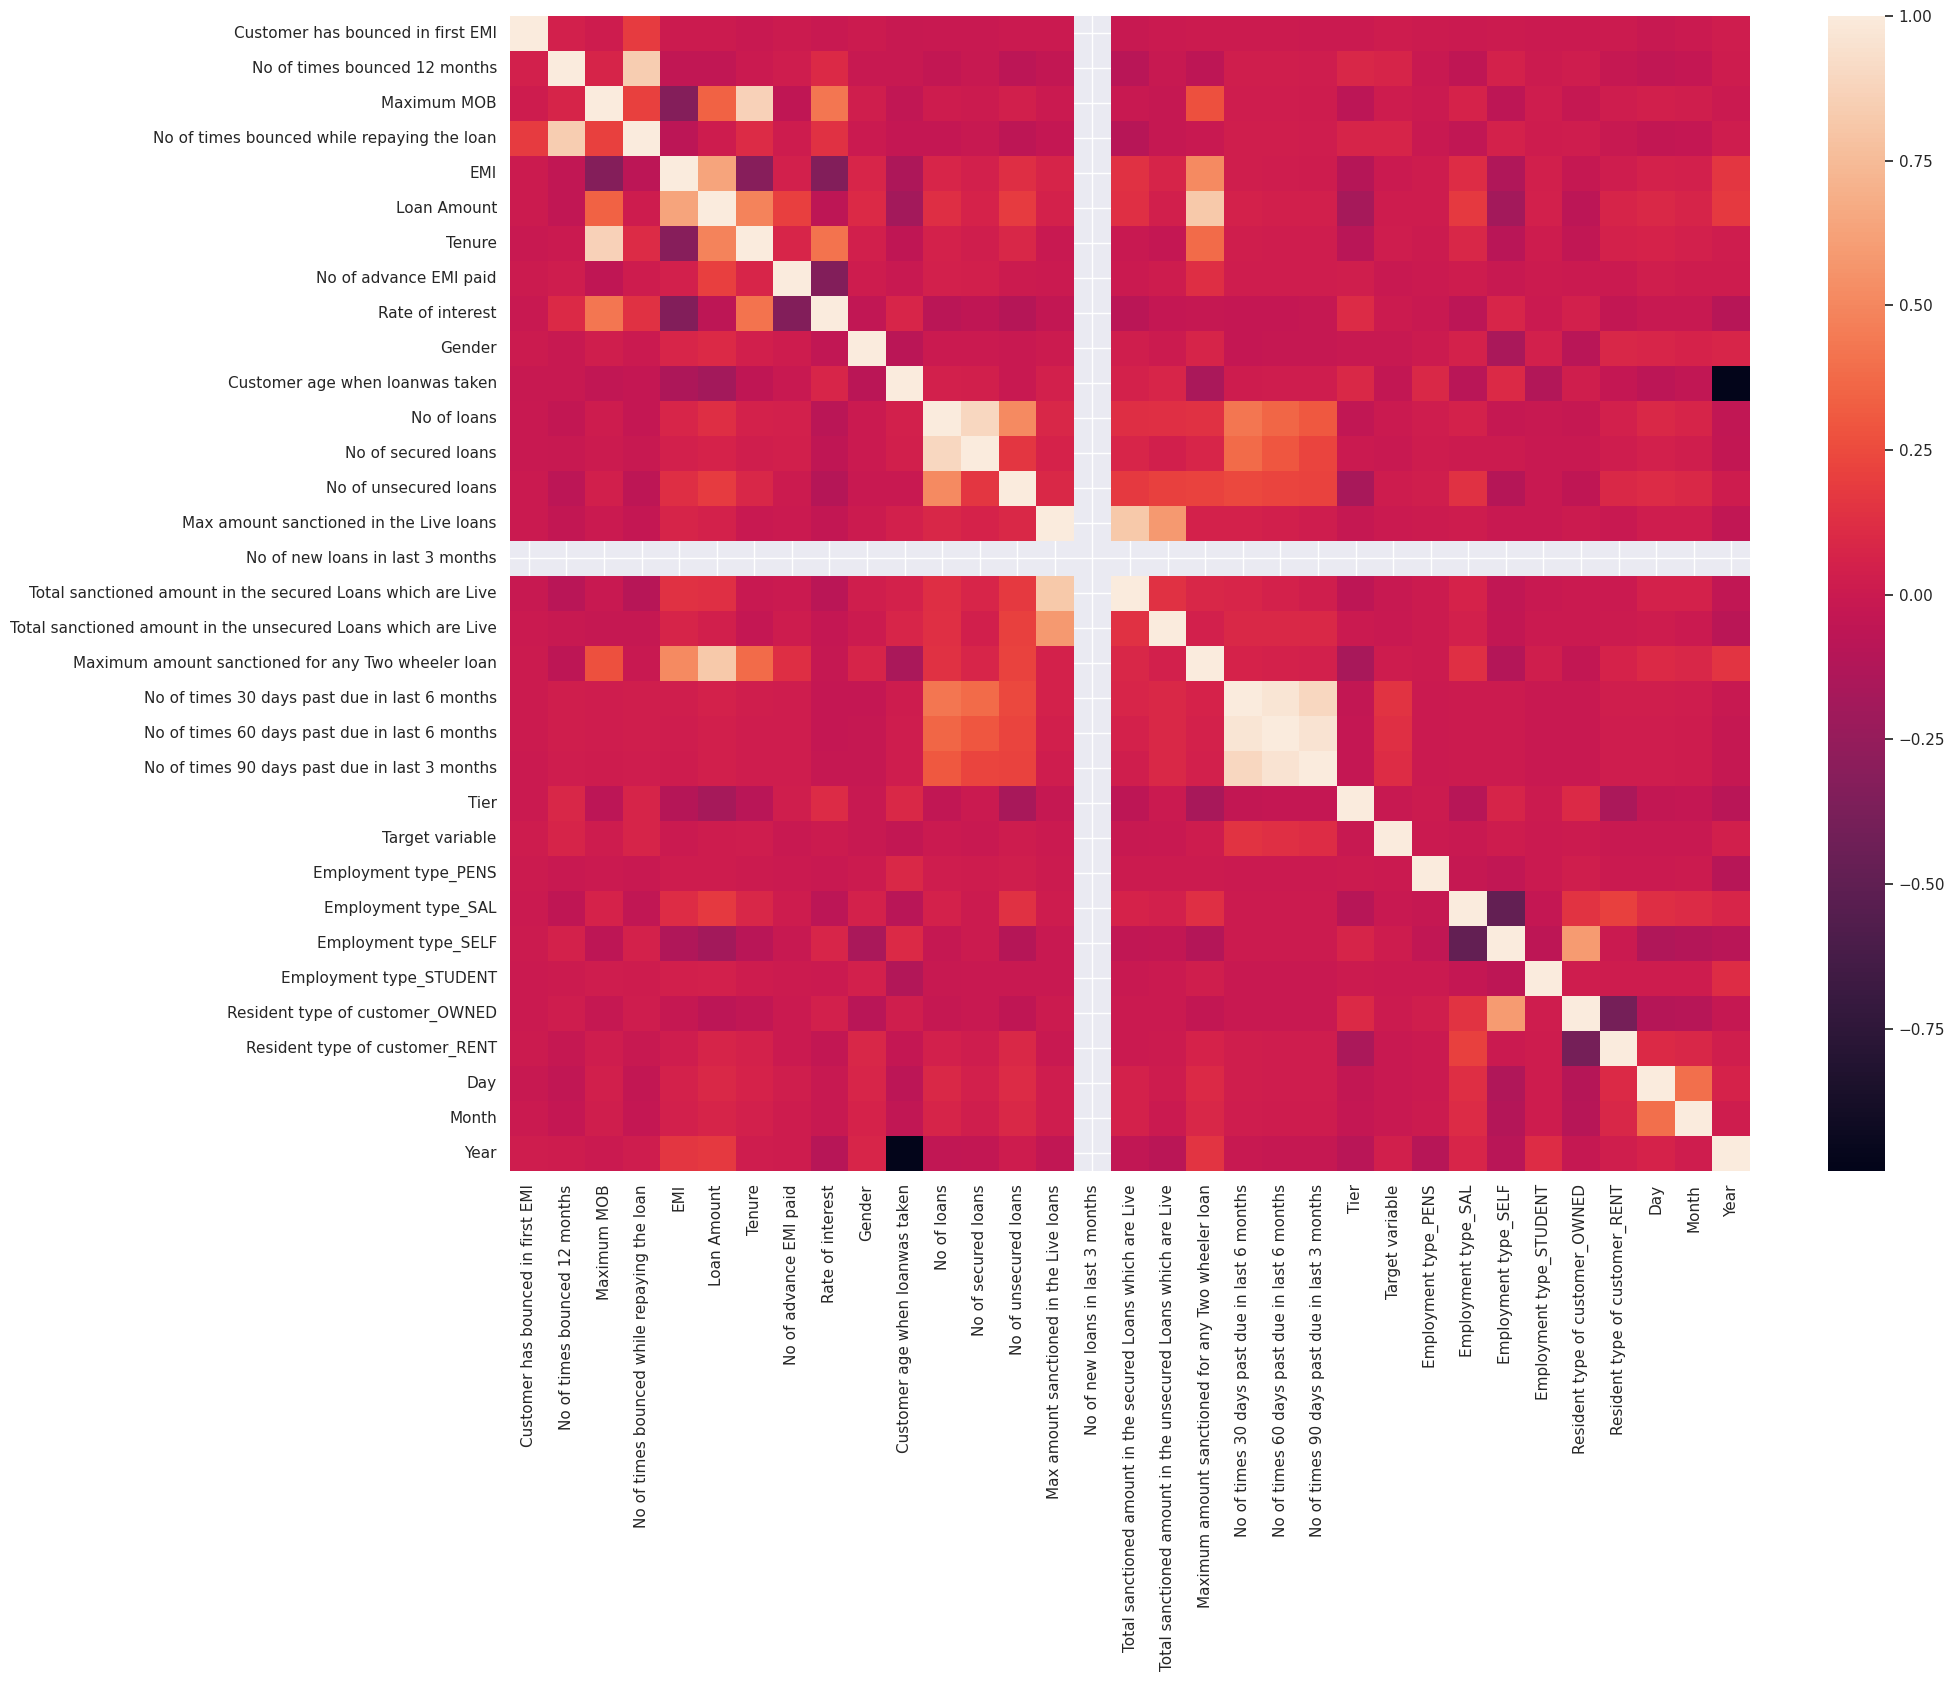

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr_mat)

In [ ]:
data_cleaned

,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,No of advance EMI paid,Rate of interest,Gender,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable,Employment type_PENS,Employment type_SAL,Employment type_SELF,Employment type_STUDENT,Resident type of customer_OWNED,Resident type of customer_RENT,Day,Month,Year
0,0,0,24.0,0.0,2432.0,46500.0,24.0,0.0,12.75,1.0,40.0,1,1,0,NaN,0,NaN,NaN,46500.0,0,0,0,1.0,0,False,False,False,False,True,False,30.0,5.0,1974.0
1,0,1,24.0,1.0,1495.0,28168.0,24.0,0.0,13.65,0.0,47.0,1,1,0,NaN,0,NaN,NaN,28168.0,0,0,0,1.0,0,False,False,True,False,False,True,1.0,9.0,1967.0
2,0,0,26.0,0.0,1707.0,38900.0,30.0,0.0,12.65,0.0,31.0,9,6,3,55000.0,0,NaN,105000.0,38900.0,31,31,16,1.0,0,False,False,True,False,False,True,4.0,5.0,1983.0
3,0,0,24.0,0.0,2128.0,42900.0,24.0,2.0,9.50,1.0,24.0,1,1,0,NaN,0,NaN,NaN,42900.0,0,0,0,1.0,0,False,True,False,False,False,True,10.0,12.0,1989.0
4,0,0,27.0,0.0,1824.0,40900.0,30.0,0.0,13.50,0.0,30.0,1,1,0,NaN,0,NaN,NaN,40900.0,0,0,0,1.0,0,False,True,False,False,False,True,24.0,9.0,1984.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119523,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,0,0,3.0,0,False,False,False,False,False,False,NaN,NaN,NaN
119524,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,NaN,0,NaN,NaN,33000.0,3,1,0,3.0,1,False,False,False,False,False,False,NaN,NaN,NaN
119525,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,0,0,3.0,0,False,False,False,False,False,False,NaN,NaN,NaN
119526,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,2,31990.0,0,NaN,31990.0,43600.0,0,0,0,1.0,0,False,False,False,False,False,False,NaN,NaN,NaN


In [ ]:
data_cleaned.isna().sum()

,0
Customer has bounced in first EMI,0
No of times bounced 12 months,0
Maximum MOB,34480
No of times bounced while repaying the loan,34480
EMI,34480
Loan Amount,34480
Tenure,34480
No of advance EMI paid,34480
Rate of interest,34480
Gender,34480


In [ ]:
data_cleaned = data_cleaned.drop(['Max amount sanctioned in the Live loans', 'Total sanctioned amount in the secured Loans which are Live', 'Total sanctioned amount in the unsecured Loans which are Live'], axis=1)


In [ ]:
df = data_cleaned

In [ ]:

null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)

Customer has bounced in first EMI                      0.000000
No of times bounced 12 months                          0.000000
Maximum MOB                                           28.846797
No of times bounced while repaying the loan           28.846797
EMI                                                   28.846797
Loan Amount                                           28.846797
Tenure                                                28.846797
No of advance EMI paid                                28.846797
Rate of interest                                      28.846797
Gender                                                28.846797
Customer age when loanwas taken                       28.846797
No of loans                                            0.000000
No of secured loans                                    0.000000
No of unsecured loans                                  0.000000
No of new loans in last 3 months                       0.000000
Maximum amount sanctioned for any Two wh

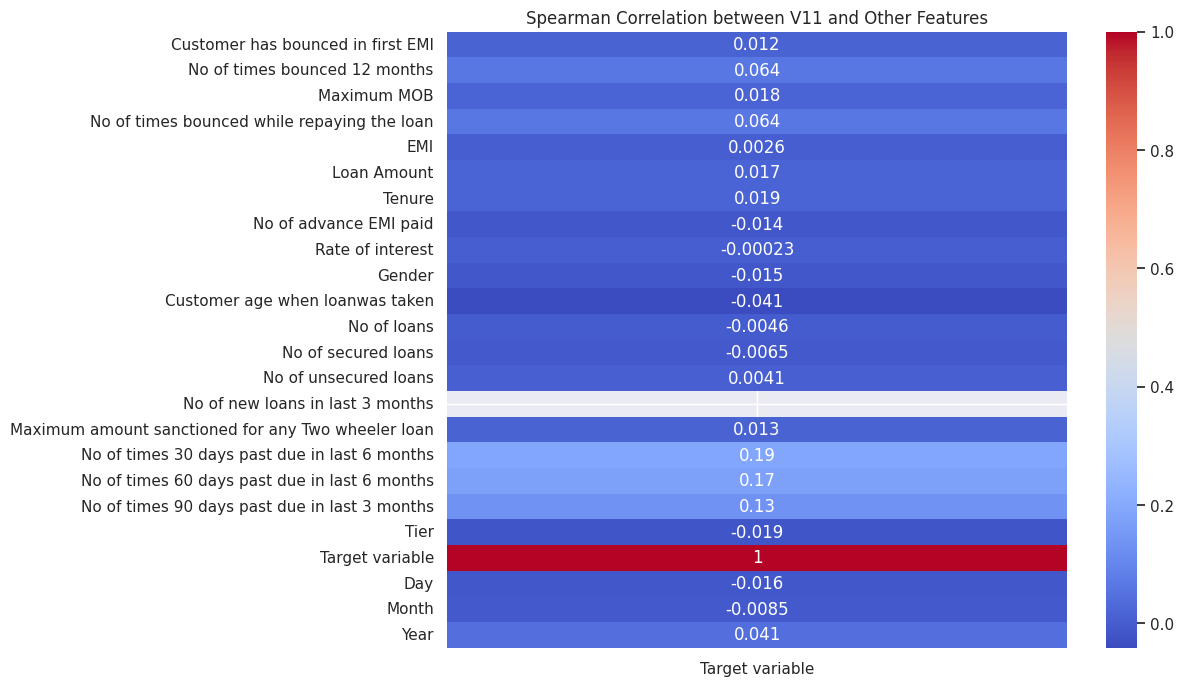

In [ ]:
# Calculate Spearman correlation for numerical features only
spearman_corr = df.select_dtypes(include=np.number).corr(method='spearman')

# Visualize the Spearman correlation with V11
# (Make sure V11 is a numerical feature)
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr[['Target variable']], annot=True, cmap='coolwarm')
plt.title('Spearman Correlation between V11 and Other Features')
plt.show()

In [ ]:
df_not_null = df[df['Target variable'].notnull()]
df_null = df[df['Target variable'].isnull()]

# Features to predict V11
features = ["No of times bounced 12 months","No of times bounced while repaying the loan","Customer age when loanwas taken","No of times 30 days past due in last 6 months","No of times 60 days past due in last 6 months","No of times 90 days past due in last 3 months"]  # You can choose more based on correlation

# Define X and y for training
x = df_not_null[features]
y = df_not_null['Target variable']

In [ ]:
x

,No of times bounced 12 months,No of times bounced while repaying the loan,Customer age when loanwas taken,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months
0,0,0.0,40.0,0,0,0
1,1,1.0,47.0,0,0,0
2,0,0.0,31.0,31,31,16
3,0,0.0,24.0,0,0,0
4,0,0.0,30.0,0,0,0
...,...,...,...,...,...,...
119523,1,NaN,NaN,0,0,0
119524,0,NaN,NaN,3,1,0
119525,0,NaN,NaN,0,0,0
119526,1,NaN,NaN,0,0,0


In [ ]:
result = pd.concat([x, y], axis=1)

In [ ]:


# Check the distribution of the 'Target' column
class_distribution = result['Target variable'].value_counts()

print(class_distribution)


Target variable
0    116914
1      2614
Name: count, dtype: int64


In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = result[result['Target variable'] == 0]
minority_class = result[result['Target variable'] == 1]

# Oversample minority class
minority_oversampled = resample(minority_class,
                                replace=True,    # sample with replacement
                                n_samples=len(majority_class),  # to match majority class size
                                random_state=42)  # for reproducibility

# Combine majority class with oversampled minority class
result_balanced = pd.concat([majority_class, minority_oversampled])

# Shuffle the dataset to mix the classes
result_balanced = result_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(result_balanced['Target variable'].value_counts())


Target variable
1    116914
0    116914
Name: count, dtype: int64


In [ ]:
result_balanced.head()

,No of times bounced 12 months,No of times bounced while repaying the loan,Customer age when loanwas taken,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable
0,1,1.0,43.0,0,0,0,1
1,0,0.0,49.0,0,0,0,0
2,1,NaN,NaN,4,4,1,1
3,0,0.0,52.0,0,0,0,0
4,0,0.0,29.0,56,55,26,1


In [ ]:
result_balanced.shape

(233828, 7)

In [ ]:
result_balanced.dropna(inplace=True)

In [ ]:
result_balanced.shape

(166219, 7)

In [ ]:
from sklearn.model_selection import train_test_split
# Correctly separate features and target
X = result_balanced.drop('Target variable', axis=1)  # Correct the use of drop()
y = result_balanced['Target variable']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Install PyCaret if not already installed
!pip install pycaret

,Description,Value
0,Session id,123
1,Target,Target variable
2,Target type,Binary
3,Original data shape,"(132975, 7)"
4,Transformed data shape,"(132975, 7)"
5,Transformed train set shape,"(106380, 7)"
6,Transformed test set shape,"(26595, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8462,0.9176,0.7812,0.8974,0.8353,0.6924,0.6983,6.9930
rf,Random Forest Classifier,0.8440,0.9155,0.7822,0.8921,0.8335,0.6880,0.6933,5.7370
dt,Decision Tree Classifier,0.8425,0.9123,0.7812,0.8899,0.8320,0.6850,0.6901,0.1690
knn,K Neighbors Classifier,0.8069,0.8720,0.7862,0.8198,0.8026,0.6138,0.6144,2.0950
xgboost,Extreme Gradient Boosting,0.7988,0.8679,0.7371,0.8403,0.7853,0.5975,0.6021,1.1100
lightgbm,Light Gradient Boosting Machine,0.7881,0.8539,0.7223,0.8310,0.7728,0.5760,0.5810,6.0050
gbc,Gradient Boosting Classifier,0.7657,0.8220,0.7073,0.8001,0.7508,0.5313,0.5349,7.7250
ada,Ada Boost Classifier,0.7557,0.8118,0.7083,0.7818,0.7432,0.5113,0.5136,1.7150
lr,Logistic Regression,0.7363,0.7958,0.6503,0.7846,0.7111,0.4724,0.4795,1.6930
ridge,Ridge Classifier,0.7016,0.7696,0.5952,0.7552,0.6657,0.4030,0.4124,0.0880


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

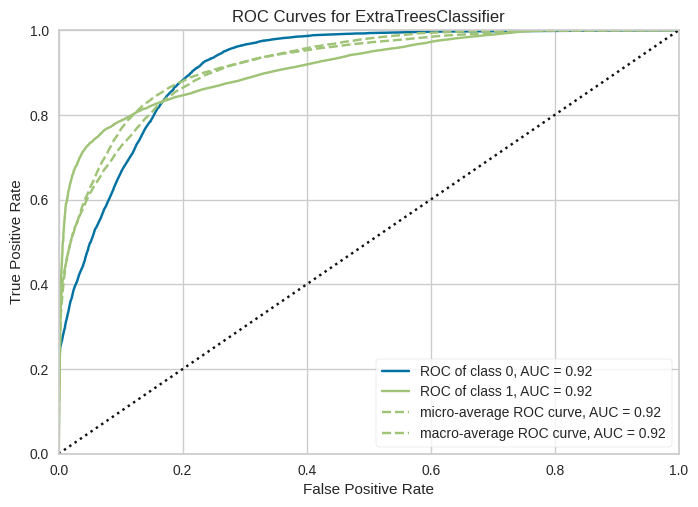

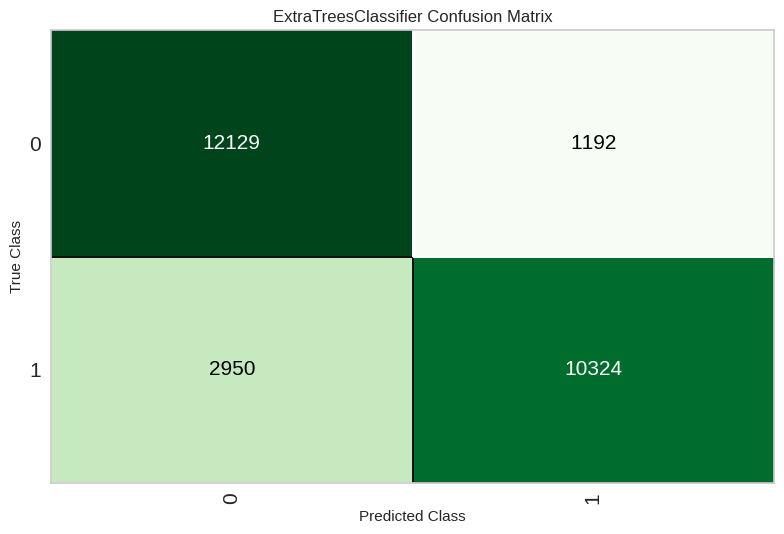

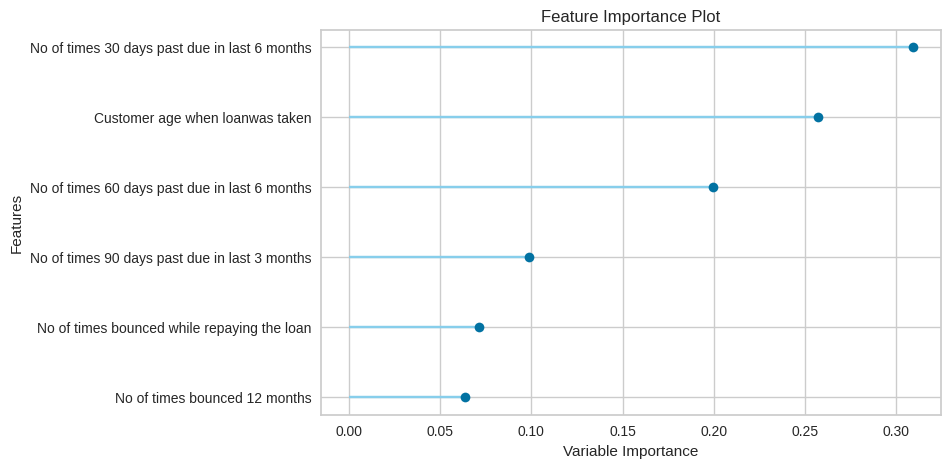

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [ ]:

# Import necessary library
from pycaret.classification import setup, compare_models, pull, plot_model

# Combine x_train and y_train into one DataFrame for PyCaret
import pandas as pd

train_data = pd.concat([x_train, y_train], axis=1)

# Initialize PyCaret setup with your training data
clf = setup(data=train_data, target='Target variable', train_size=0.8, session_id=123)

# Compare all models and select the best one
best_model = compare_models()

# Pull the performance comparison of all models into a DataFrame
model_results = pull()

# Plot a comparison of models based on accuracy
plot_model(best_model, plot='auc')

# Plot the confusion matrix for the best model
plot_model(best_model, plot='confusion_matrix')

# Only plot feature importance if the model supports it
if hasattr(best_model, 'feature_importances_') or hasattr(best_model, 'coef_'):
    plot_model(best_model, plot='feature')
else:
    print("Feature importance is not available for this model.")

# Plot all models' performance comparison (like bar chart of accuracy)
plot_model(best_model, plot='parameter')


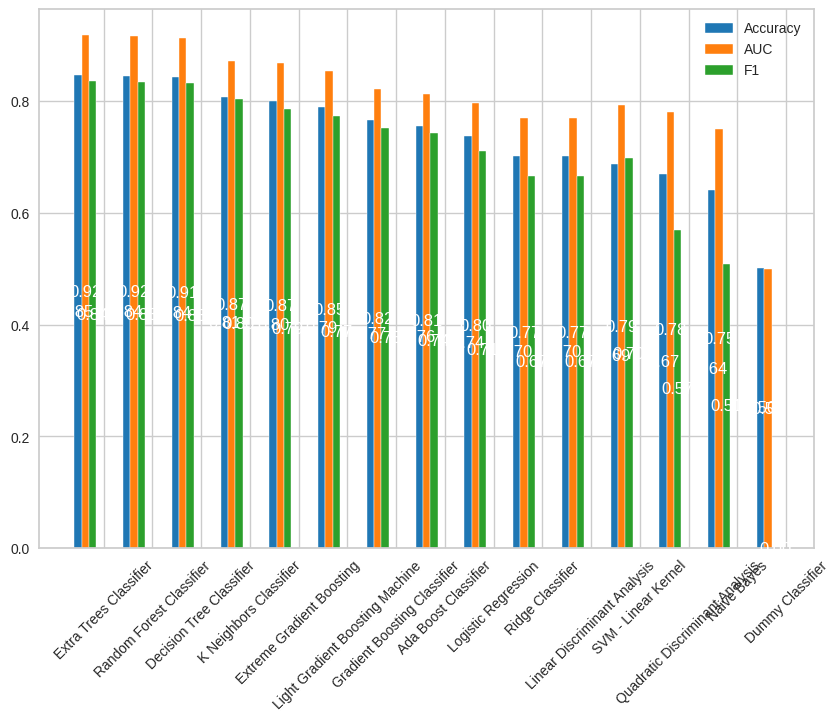

In [ ]:

x = model_results["Model"]
x_indices = np.arange(len(x))  # Numeric indices for the x values

bar_width = 0.15  # Width of each bar
colors = plt.cm.get_cmap('tab10', len(model_results.columns) - 1)  # Use a colormap for different colors

plt.subplots(figsize=(10, 7))

# Loop through each y col'umn (except "Model") to plot separate bars
for i, col in enumerate(["Accuracy","AUC","F1"]):
    if col == "Model":
        continue
    y = model_results[col]

    # Shift x positions to ensure bars for different columns don't overlap
    bar_positions = x_indices + i * bar_width

    # Create a bar chart with a different color for each column
    bars = plt.bar(bar_positions, y, bar_width, label=col, color=colors(i))

    # Add labels inside the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height * 0.5,
                 f'{height:.2f}', ha='center', va='center', color='white')

# Adjust x-axis labels to be at the center of the grouped bars
plt.xticks(x_indices + bar_width * (len(model_results.columns) - 2) / 2, x, rotation=45)

plt.legend()  # Show legend
plt.show()
